In [19]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [2]:
style.use('fivethirtyeight')

In [3]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

# Slope and Intercept equations
# $ m\space(slope) = \frac{\bar{x}\cdot\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}$
# $ b\space(intercept) = \bar{y} - m\bar{x}$

# Proof:
### $ \begin{align} 
E &= \displaystyle\sum_i (y_i - mx_i -b)^2  \\
 &= \displaystyle\sum_i (y_i^2 + m^2x_i^2+b^2 - 2mx_iy_i +2bmx_i -2by_i) \\ 
 &=\displaystyle\sum_iy_i^2+m^2\displaystyle\sum_ix_i^2+\displaystyle\sum_ib^2+2bm\displaystyle\sum_ix_i-2m\displaystyle\sum_ix_iy_i-2b\displaystyle\sum_iy_i \\
 &=C + m^2A +Nb^2 +2bmX -2mB-2bY \end{align} $
### ,where $X = \displaystyle\sum_ix_i, Y = \displaystyle\sum_iy_i, A = \displaystyle\sum_ix_i^2, B = \displaystyle\sum_ix_iy_i, C = \displaystyle\sum_iy_i^2$
### $ \begin{align}
\frac{\partial E}{\partial m} &= 2\displaystyle\sum_i(y_i - mx_i -b)(-x_i) = 2\displaystyle\sum_i(mx_i^2 + bx_i-x_iy_i) \\
&= 2mA + 2bX - 2B = 0 \\
\frac{\partial E}{\partial b} &= 2\displaystyle\sum_i(y_i-mx_i-b)(-1) = 2\displaystyle\sum_i(mx_i+b-y_i)\\
&= 2mX+2bN-2Y = 0 \\
Y &= mX+bN \rightarrow  b = \frac{Y-mX}{N} = \frac{\displaystyle\sum_iy_i-m\displaystyle\sum_ix_i}{N} = \bar{y}-m\bar{x}\\
0 &= mA + \frac{Y-mX}{N}X - B = m(A-\frac{X^2}{N}) +\frac{XY}{N} - B \\
m &= \frac{NB-XY}{NA-X^2} = \frac{\frac{XY-NB}{N^2}}{\frac{X^2-NA}{N^2}}
= \frac{\frac{\sum_ix_i\sum_iy_i}{N^2}-\frac{\sum_ix_iy_i}{N}}{\Bigg(\frac{\sum_ix_i}{N}\Bigg)^2-\frac{\sum_ix_i^2}{N}} = \frac{\bar{x}\cdot\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}
\end{align}$

In [4]:
def best_fit_slope_and_intercept(xs,ys):
    m = ( (mean(xs)*mean(ys)) - mean(xs*ys) ) / ( (mean(xs))**2 - mean(xs**2))
    b = mean(ys) - m*mean(xs)
    return m,b 

In [9]:
m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

0.42857142857142866 4.0


In [10]:
regression_line = [ (m*x) + b for x in xs ]

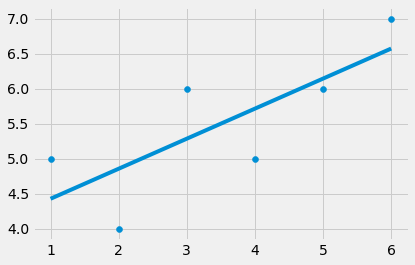

In [11]:
plt.scatter(xs,ys)
plt.plot(xs, regression_line)

# Prediction

In [12]:
predict_x = 8
predict_y = (m*predict_x) + b

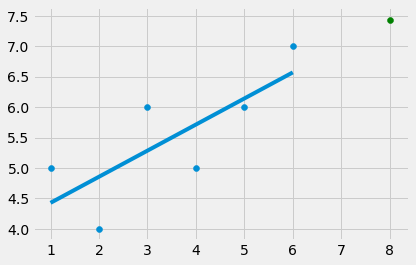

In [13]:
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x,predict_y, color = 'g')

# Acurancy & Confidence --> R-Squared

# $ r^2 = 1 - \frac{SE\hat{y}}{SE\bar{y}}\space , where\space SE = Squared\space Error$
# $ SE\hat{y}$

In [15]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)


In [18]:
def coefficient_of_determination(ys_orig, ys_line):
    ys_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, ys_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.5844155844155845


# Define Dataset for testing

In [21]:
# how much number created, are they correlated
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1 # starting value for y
    ys = [] # empty list
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+= step
        elif correlation and correlation == 'neg':
            val-= step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39.] [ -1.  37. -20.  31.  44.  23.   4.  48.  35.  11.  20.  44.   3.  65.
   5.   7.  67.  50.  63.  52.  67.  24.  82.  63.  12.  17.  26.  19.
  56.  51.  90.  99.  65.  29. 107.  47.  40.  58.  97. 109.]


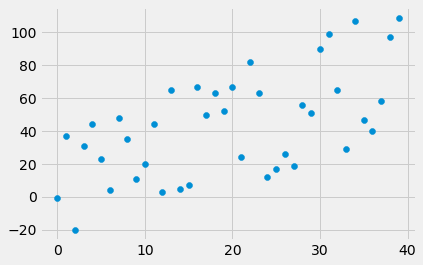

In [30]:
xs, ys = create_dataset(40, 40, 2, correlation='pos')
print(xs,ys)
plt.scatter(xs,ys)

0.35060688797722317


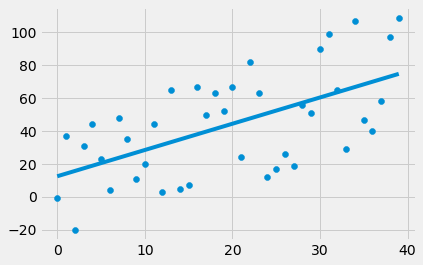

In [31]:
m,b = best_fit_slope_and_intercept(xs,ys)
regression_line = [ (m*x) + b for x in xs ]
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

# How to test?
## If decrease the variance, the coefficient should be higher since 1- the difference ratio.
## If correlation becomes 'False', the coefficient decreases due to no correlation. --> cannot do linear regression if coefficient ~ 0.0005...